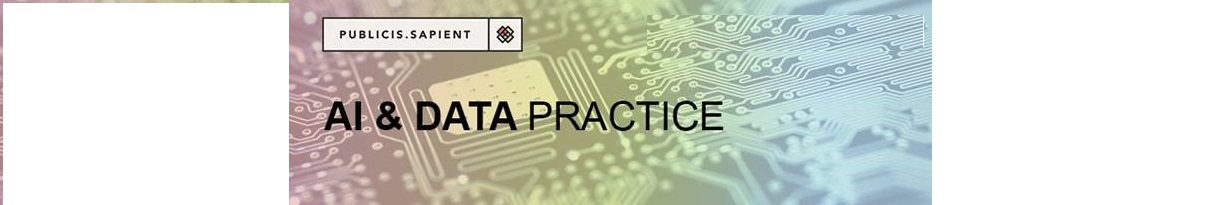

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os as os
Image("C:\\Users\\ajaohri\\Desktop\\ODSP\\img\\logo.jpg")


## Cluster analysis or clustering 
is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis. Some types of clustering in Python are as follows

- cluster.AffinityPropagation 	 
- cluster.Agglomerative  
- cluster.Birch  
- cluster.DBSCAN 	 
- cluster.FeatureAgglomeration 	 
- cluster.KMeans 	 
- cluster.MiniBatchKMeans   
- cluster.MeanShift 	  
- cluster.SpectralClustering
- sklearn.mixture




Clustering Methods Covered Here

- K Means, 
- Hclus, 
- DBSCAN, 
- Gaussian Mixture Models,
- Birch,
- miniBatch Kmeans
- Mean Shift

### Silhouette Coefficient

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster.
The Silhouette Coefficient s for a single sample is then given as: b-a/(max(a,b)

###  Homogeneity, completeness and V-measure
the following two desirable objectives for any cluster assignment:
- homogeneity: each cluster contains only members of a single class.
- completeness: all members of a given class are assigned to the same cluster.
    
those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better): Their harmonic mean called V-measure is computed by v_measure_score

## K Means Clustering

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean  of the samples in the cluster called the cluster “centroids”. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

Inertia is not a normalized metric. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from collections import Counter
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [4]:
clusdf=pd.read_csv('C:\\Users\\ajaohri\\Desktop\\ODSP\\data\\plantTraits.csv')

https://vincentarelbundock.github.io/Rdatasets/doc/cluster/plantTraits.html

Usage
**data(plantTraits)**
Format
A data frame with 136 observations on the following 31 variables.

- **pdias**
Diaspore mass (mg)

- **longindex**
Seed bank longevity

- **durflow**
Flowering duration

- **height**
Plant height, an ordered factor with levels 1 < 2 < ... < 8.

- **begflow**
Time of first flowering, an ordered factor with levels 1 < 2 < 3 < 4 < 5 < 6 < 7 < 8 < 9

- **mycor**
Mycorrhizas, an ordered factor with levels 0never < 1 sometimes< 2always

- **vegaer**
aerial vegetative propagation, an ordered factor with levels 0never < 1 present but limited< 2important.

- **vegsout**
underground vegetative propagation, an ordered factor with 3 levels identical to vegaer above.

- **autopoll**
selfing pollination, an ordered factor with levels 0never < 1rare < 2 often< the rule3

- **insects**
insect pollination, an ordered factor with 5 levels 0 < ... < 4.

- **wind**
wind pollination, an ordered factor with 5 levels 0 < ... < 4.

- **lign**
a binary factor with levels 0:1, indicating if plant is woody.

- **piq**
a binary factor indicating if plant is thorny.

- **ros**
a binary factor indicating if plant is rosette.

- **semiros**
semi-rosette plant, a binary factor (0: no; 1: yes).

- **leafy**
leafy plant, a binary factor.

- **suman**
summer annual, a binary factor.

- **winan**
winter annual, a binary factor.

- **monocarp**
monocarpic perennial, a binary factor.

- **polycarp**
polycarpic perennial, a binary factor.

- **seasaes**
seasonal aestival leaves, a binary factor.

- **seashiv**
seasonal hibernal leaves, a binary factor.

- **seasver**
seasonal vernal leaves, a binary factor.

- **everalw**
leaves always evergreen, a binary factor.

- **everparti**
leaves partially evergreen, a binary factor.

- **elaio**
fruits with an elaiosome (dispersed by ants), a binary factor.

- **endozoo**
endozoochorous fruits, a binary factor.

- **epizoo**
epizoochorous fruits, a binary factor.

- **aquat**
aquatic dispersal fruits, a binary factor.

- **windgl**
wind dispersed fruits, a binary factor.

- **unsp**
unspecialized mechanism of seed dispersal, a binary factor.

In [5]:
clusdf = clusdf.drop("Unnamed: 0", axis=1)

In [6]:
clusdf.head()

,pdias,longindex,durflow,height,begflow,mycor,vegaer,vegsout,autopoll,insects,...,seashiv,seasver,everalw,everparti,elaio,endozoo,epizoo,aquat,windgl,unsp
0,96.84,0.000000,2,7,5,2.0,0.0,0.0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,110.72,0.000000,3,8,4,2.0,0.0,0.0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.06,0.666667,3,2,6,2.0,0.0,1.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.08,0.488889,2,2,7,1.0,2.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.48,0.476190,3,2,5,2.0,2.0,0.0,1,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
clusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 31 columns):
pdias        100 non-null float64
longindex    111 non-null float64
durflow      136 non-null int64
height       136 non-null int64
begflow      136 non-null int64
mycor        97 non-null float64
vegaer       134 non-null float64
vegsout      134 non-null float64
autopoll     136 non-null int64
insects      136 non-null int64
wind         136 non-null int64
lign         136 non-null int64
piq          136 non-null int64
ros          132 non-null float64
semiros      132 non-null float64
leafy        132 non-null float64
suman        136 non-null int64
winan        136 non-null int64
monocarp     136 non-null int64
polycarp     136 non-null int64
seasaes      132 non-null float64
seashiv      132 non-null float64
seasver      132 non-null float64
everalw      132 non-null float64
everparti    132 non-null float64
elaio        131 non-null float64
endozoo      131 non-null float64
ep

In [8]:
#missing values
clusdf.apply(lambda x: sum(x.isnull().values), axis = 0) 

pdias        36
longindex    25
durflow       0
height        0
begflow       0
mycor        39
vegaer        2
vegsout       2
autopoll      0
insects       0
wind          0
lign          0
piq           0
ros           4
semiros       4
leafy         4
suman         0
winan         0
monocarp      0
polycarp      0
seasaes       4
seashiv       4
seasver       4
everalw       4
everparti     4
elaio         5
endozoo       5
epizoo        5
aquat         5
windgl        5
unsp          5
dtype: int64

In [9]:
clusdf.head(20)

,pdias,longindex,durflow,height,begflow,mycor,vegaer,vegsout,autopoll,insects,...,seashiv,seasver,everalw,everparti,elaio,endozoo,epizoo,aquat,windgl,unsp
0,96.84,0.000000,2,7,5,2.0,0.0,0.0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,110.72,0.000000,3,8,4,2.0,0.0,0.0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.06,0.666667,3,2,6,2.0,0.0,1.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.08,0.488889,2,2,7,1.0,2.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.48,0.476190,3,2,5,2.0,2.0,0.0,1,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,2.33,0.500000,3,5,4,0.0,0.0,0.0,3,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.38,0.904762,3,2,6,2.0,0.0,0.0,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,2.55,0.066667,3,2,3,2.0,0.0,2.0,1,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.48,0.210526,3,3,7,2.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.52,0.369565,3,2,4,2.0,0.0,0.0,2,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
clusdf=clusdf.fillna(clusdf.mean())

To measure the quality of clustering results, there are two kinds of validity indices: external indices and internal indices.

An external index is a measure of agreement between two partitions where the first partition is the a priori known clustering structure, and the second results from the clustering procedure (Dudoit et al., 2002).

Internal indices are used to measure the goodness of a clustering structure without external information (Tseng et al., 2005

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [12]:
clusdf_scale = scale(clusdf)
n_samples, n_features = clusdf_scale.shape

In [13]:
n_samples, n_features

(136, 31)

In [14]:
reduced_data = PCA(n_components=2).fit_transform(clusdf_scale)

In [15]:
#assuming height to be Y variable to be predicted
#n_digits = len(np.unique(clusdf.height))
#From R Cluster sizes:
#[1] "26 29 5 32"
n_digits=4

In [16]:
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
clusdf.head(20)

,pdias,longindex,durflow,height,begflow,mycor,vegaer,vegsout,autopoll,insects,...,seashiv,seasver,everalw,everparti,elaio,endozoo,epizoo,aquat,windgl,unsp
0,96.84,0.000000,2,7,5,2.000000,0.0,0.0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,110.72,0.000000,3,8,4,2.000000,0.0,0.0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.06,0.666667,3,2,6,2.000000,0.0,1.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.08,0.488889,2,2,7,1.000000,2.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.48,0.476190,3,2,5,2.000000,2.0,0.0,1,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,2.33,0.500000,3,5,4,0.000000,0.0,0.0,3,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.38,0.904762,3,2,6,2.000000,0.0,0.0,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,2.55,0.066667,3,2,3,2.000000,0.0,2.0,1,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.48,0.210526,3,3,7,2.000000,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.52,0.369565,3,2,4,2.000000,0.0,0.0,2,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


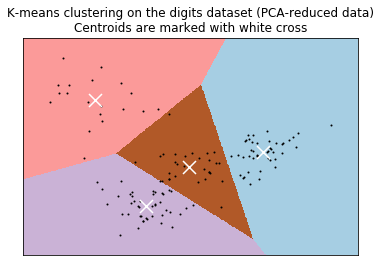

In [18]:
# Plot the decision boundary. For that, we will assign a color to each
h=0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(reduced_data)

In [20]:
kmeans.labels_

array([3, 3, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 3, 2, 0, 3, 1, 1, 3, 2, 0,
       2, 1, 1, 2, 2, 3, 0, 3, 3, 3, 3, 1, 2, 3, 2, 2, 0, 2, 2, 1, 1, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 2, 2, 3, 1, 2, 2, 2, 1, 3, 2, 2, 0, 0, 3,
       1, 3, 1, 3, 2, 3, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 3,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 2, 2, 0,
       2, 3, 3, 1, 3, 0, 3, 3, 1, 2, 0, 3, 3, 2, 3, 1, 2, 1, 3, 1, 1, 0,
       1, 2, 2, 2])

In [21]:
 np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([19, 27, 46, 44], dtype=int64))

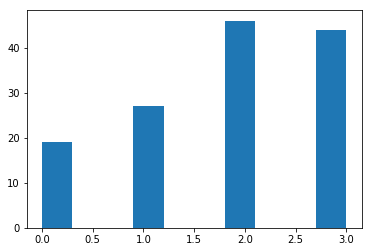

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(kmeans.labels_)
plt.show()

In [23]:
kmeans.cluster_centers_

array([[-3.36602414,  3.1534767 ],
       [ 0.23958942, -0.03244865],
       [-1.46449973, -1.88304413],
       [ 2.83755754,  0.62682014]])

In [24]:
metrics.silhouette_score(reduced_data, kmeans.labels_, metric='euclidean')

0.510458634155308

Given the knowledge of the ground truth class assignments **labels_true** and our clustering algorithm assignments of the same samples **labels_pred**.
Drawbacks
Contrary to inertia, MI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

## Hierarchical clustering 
Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.
- Single linkage minimizes the distance between the closest observations of pairs of clusters.

In [25]:
clustering = AgglomerativeClustering(n_clusters=4).fit(reduced_data)

In [26]:
clustering 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x00000204A8AA0158>)

In [27]:
clustering.labels_

array([1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 3, 3, 0, 1, 0, 2, 1, 3, 3, 1, 0, 2,
       0, 3, 3, 3, 0, 1, 2, 1, 1, 1, 1, 3, 0, 1, 0, 0, 2, 0, 0, 3, 3, 1,
       1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 1, 0, 0, 2, 2, 1,
       3, 1, 3, 1, 0, 1, 2, 3, 2, 3, 2, 3, 3, 2, 0, 2, 0, 0, 0, 2, 0, 1,
       1, 3, 0, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0,
       0, 1, 1, 3, 1, 2, 1, 1, 3, 0, 2, 1, 1, 0, 1, 3, 0, 3, 1, 3, 3, 2,
       3, 0, 0, 0], dtype=int64)

In [28]:
 np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([45, 44, 19, 28], dtype=int64))

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage


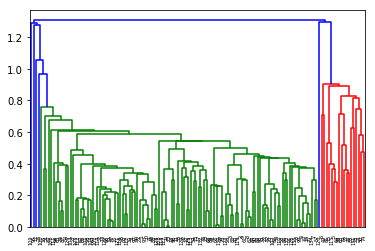

In [30]:
Z = linkage(reduced_data)

dendrogram(Z)
#dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',orientation='top')
plt.show()

In [31]:
metrics.silhouette_score(reduced_data, clustering.labels_, metric='euclidean')

0.5030507506918824

## DBSCAN
The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

In [32]:
db = DBSCAN().fit(reduced_data)

In [33]:
db

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [34]:
db.labels_

array([ 0,  0,  1,  1,  1, -1, -1,  1,  1,  1,  2,  2, -1,  0,  1, -1,  0,
        3,  3,  0,  1, -1,  1,  3,  3, -1,  1,  0, -1,  0,  0,  0,  0,  3,
        1,  4, -1,  1, -1,  1,  1,  5,  2,  0,  0,  0,  0,  0, -1, -1, -1,
       -1,  1,  1, -1, -1, -1,  1, -1,  2,  0,  1,  1, -1, -1,  4,  5,  0,
        3,  0,  1,  0, -1,  2, -1,  3, -1,  5,  5, -1, -1, -1,  1,  1, -1,
       -1,  1,  4,  0,  5,  1,  1,  0,  0,  4, -1,  3,  0,  0,  1, -1,  0,
        0,  0,  0,  0, -1,  1, -1, -1,  1,  4,  0,  3,  0, -1,  0,  0,  3,
        1, -1,  0,  0,  1,  4,  2,  1,  3,  0,  2,  5, -1,  3, -1,  1,  1],
      dtype=int64)

In [35]:
clusdf.shape

(136, 31)

In [36]:
reduced_data.shape

(136, 2)

In [37]:
reduced_data[:10,:2]

array([[ 2.98121069,  0.6383481 ],
       [ 3.09745476,  0.80626204],
       [-0.86210249, -1.40440707],
       [-1.13478554, -1.95142652],
       [-1.57232531, -2.73392256],
       [-4.3906523 ,  3.50519037],
       [-3.45110969,  4.11031248],
       [-0.74287101, -2.1922488 ],
       [-1.16032331, -1.30239933],
       [-0.87508962, -1.38612909]])

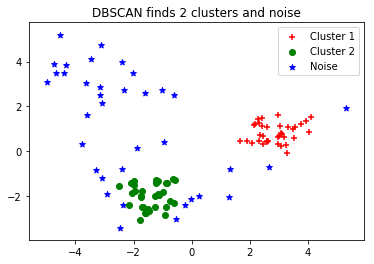

In [38]:
for i in range(0, reduced_data.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(reduced_data[i,0],reduced_data[i,1],c='r',marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(reduced_data[i,0],reduced_data[i,1],c='g',marker='o')
    elif db.labels_[i] == -1:c3 = plt.scatter(reduced_data[i,0],reduced_data[i,1],c='b',marker='*')
        
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()
    

## Gaussian mixture models

 a mixture model is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs. Formally a mixture model corresponds to the mixture distribution that represents the probability distribution of observations in the overall population. However, while problems associated with "mixture distributions" relate to deriving the properties of the overall population from those of the sub-populations, "mixture models" are used to make statistical inferences about the properties of the sub-populations given only observations on the pooled population, without sub-population identity information.

sklearn.mixture is a package which enables one to learn Gaussian Mixture Models (diagonal, spherical, tied and full covariance matrices supported), sample them, and estimate them from data. Facilities to help determine the appropriate number of components are also provided.
A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

Scikit-learn implements different classes to estimate Gaussian mixture models, that correspond to different estimation strategies.

cite- https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html 

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [40]:
clusdf.head()

,pdias,longindex,durflow,height,begflow,mycor,vegaer,vegsout,autopoll,insects,...,seashiv,seasver,everalw,everparti,elaio,endozoo,epizoo,aquat,windgl,unsp
0,96.84,0.000000,2,7,5,2.0,0.0,0.0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,110.72,0.000000,3,8,4,2.0,0.0,0.0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.06,0.666667,3,2,6,2.0,0.0,1.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.08,0.488889,2,2,7,1.0,2.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.48,0.476190,3,2,5,2.0,2.0,0.0,1,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
reduced_data

array([[ 2.98121069,  0.6383481 ],
       [ 3.09745476,  0.80626204],
       [-0.86210249, -1.40440707],
       [-1.13478554, -1.95142652],
       [-1.57232531, -2.73392256],
       [-4.3906523 ,  3.50519037],
       [-3.45110969,  4.11031248],
       [-0.74287101, -2.1922488 ],
       [-1.16032331, -1.30239933],
       [-0.87508962, -1.38612909],
       [-0.40847588,  0.15687594],
       [-0.84419664,  0.50781115],
       [ 1.29494537, -2.02713586],
       [ 2.31070748,  0.45546458],
       [-1.48421478, -2.5673099 ],
       [-4.72912754,  3.89614474],
       [ 1.89467351,  0.48273571],
       [ 1.01162472,  0.63712346],
       [ 0.69245123, -0.70082352],
       [ 2.61702335,  0.48298616],
       [-1.73119948, -2.03574078],
       [-1.58890059,  2.61636085],
       [-2.07111479, -1.41434179],
       [ 1.2030633 ,  0.0808182 ],
       [ 0.82616098, -0.3522734 ],
       [-1.87753718,  0.13858317],
       [-1.26922479, -1.97995475],
       [ 4.04418495,  0.85936943],
       [-2.32858489,

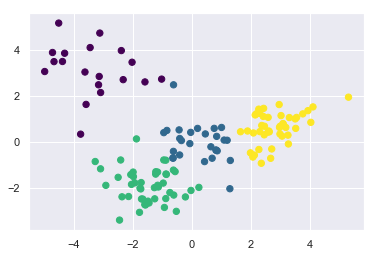

In [42]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(reduced_data).predict(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=40, cmap='viridis');

In [43]:
X=reduced_data

In [44]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

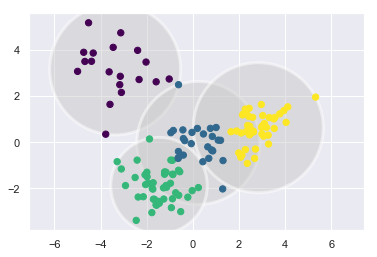

In [45]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

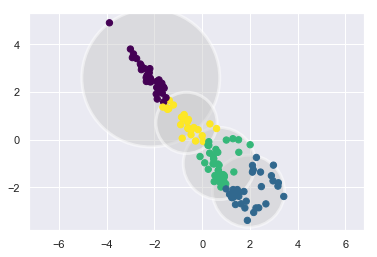

In [46]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

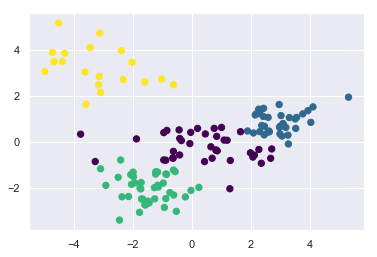

In [47]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [48]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.041 0.959 0.    0.   ]
 [0.022 0.978 0.    0.   ]
 [0.087 0.    0.913 0.   ]
 [0.005 0.    0.995 0.   ]
 [0.    0.    1.    0.   ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


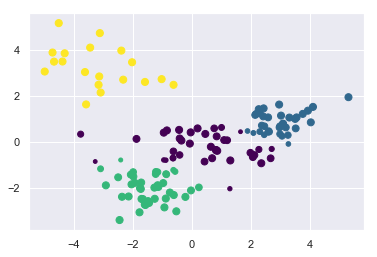

In [49]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [50]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

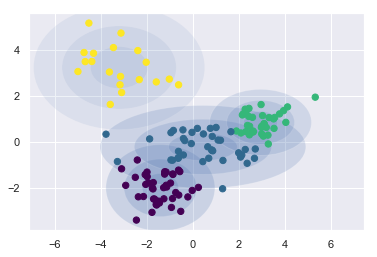

In [51]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

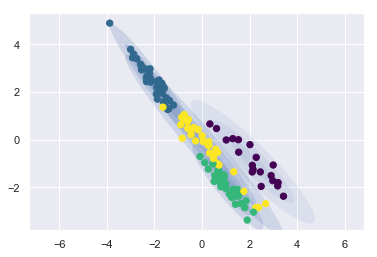

In [52]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

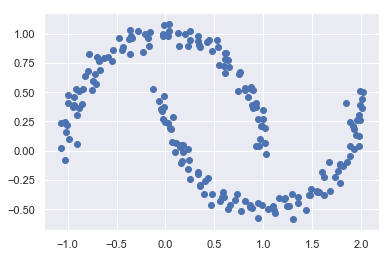

In [53]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

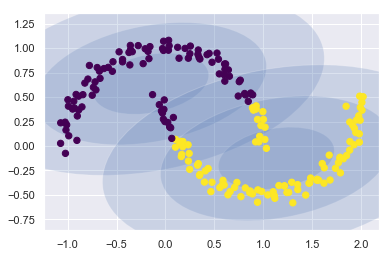

In [54]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

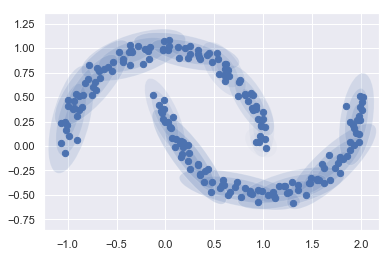

In [55]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall distribution of the input data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l

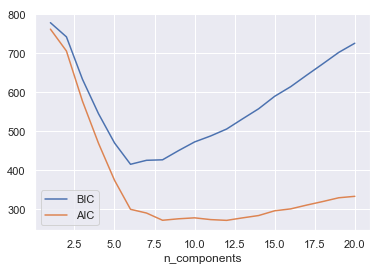

In [56]:
 
%matplotlib inline
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. Here it is 8.

# BIRCH

The Birch (Balanced Iterative Reducing and Clustering using Hierarchies ) builds a tree called the Characteristic Feature Tree (CFT) for the given data. The data is essentially lossy compressed to a set of Characteristic Feature nodes (CF Nodes). The CF Nodes have a number of subclusters called Characteristic Feature subclusters (CF Subclusters) and these CF Subclusters located in the non-terminal CF Nodes can have CF Nodes as children.

The CF Subclusters hold the necessary information for clustering which prevents the need to hold the entire input data in memory. This information includes:

- Number of samples in a subcluster.
- Linear Sum - A n-dimensional vector holding the sum of all samples
- Squared Sum - Sum of the squared L2 norm of all samples.
- Centroids - To avoid recalculation linear sum / n_samples.
- Squared norm of the centroids.

It is a memory-efficient, online-learning algorithm provided as an alternative to MiniBatchKMeans. It constructs a tree data structure with the cluster centroids being read off the leaf. These can be either the final cluster centroids or can be provided as input to another clustering algorithm such as AgglomerativeClustering.

In [57]:
from sklearn.cluster import Birch


In [58]:
X = reduced_data
brc = Birch(branching_factor=50, n_clusters=None, threshold=0.5,compute_labels=True)
brc.fit(X) 


Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.5)

In [59]:
brc.predict(X)

array([ 0,  0,  1,  1,  2,  3,  4, 16,  1,  1,  5,  5,  6,  0,  2,  3,  7,
        7,  8,  0, 10,  9, 10,  7,  8, 11,  1, 12,  9,  0, 12, 12,  7, 19,
       10, 13, 14,  2, 15, 10,  1, 21,  5,  0,  0, 12,  0,  0, 16,  4, 17,
       14, 10,  2, 13,  5, 18, 18, 18, 19,  0,  1,  1, 20,  3, 13, 21, 22,
        7, 22,  2,  0, 15, 19, 17,  8, 15, 21, 21, 20, 14,  3, 10, 10,  2,
        9,  1, 13,  0, 21,  2, 16, 12,  0, 13, 23,  8, 12, 22,  2,  2, 22,
       22, 22, 22, 22,  8, 10, 24, 25, 10, 13, 22, 19, 22,  3, 22, 12,  8,
        1, 26,  7,  0,  1, 13,  5,  2,  8,  0,  5, 21, 27, 19, 18, 16, 16])

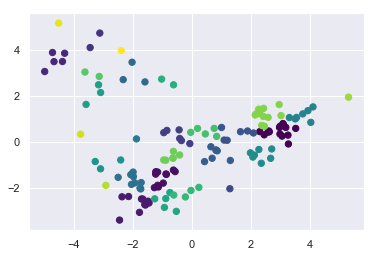

In [60]:
labels = brc.predict(X)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=40, cmap='viridis');
plt.show()

 # Mini Batch K-Means

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

The algorithm iterates between two major steps, similar to vanilla k-means. In the first step,  samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis.

In [61]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
X = reduced_data 
 # manually fit on batches
kmeans = MiniBatchKMeans(n_clusters=2,random_state=0,batch_size=6)
kmeans = kmeans.partial_fit(X[0:6,:])
kmeans = kmeans.partial_fit(X[6:12,:])
kmeans.cluster_centers_

array([[-0.15215043, -0.88612361],
       [-3.920881  ,  3.80775143]])

In [62]:
kmeans.predict(X)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0])

In [63]:
# fit on the whole data
kmeans = MiniBatchKMeans(n_clusters=4,random_state=0,batch_size=6,max_iter=10).fit(X)
kmeans.cluster_centers_

array([[ 3.0637747 ,  0.96135362],
       [-1.36748947, -1.28880873],
       [-3.06818535,  2.85929334],
       [ 1.56257397, -0.15754802]])

In [64]:
kmeans.predict(X)

array([0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 0, 1, 2, 3, 3, 3, 0, 1, 2,
       1, 3, 3, 1, 1, 0, 2, 0, 0, 0, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 3, 0,
       0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 0, 1, 1, 2, 2, 3,
       1, 0, 3, 0, 1, 0, 2, 3, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3,
       0, 1, 1, 1, 0, 0, 3, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 1, 1, 2,
       1, 3, 0, 3, 0, 2, 0, 0, 3, 1, 2, 3, 0, 1, 3, 1, 1, 3, 0, 1, 1, 2,
       3, 1, 1, 1])

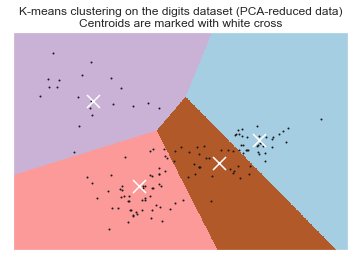

In [65]:
# Plot the decision boundary. For that, we will assign a color to each
h=0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#   Mean Shift 
MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.
Mean shift clustering using a flat kernel.

Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

Seeding is performed using a binning technique for scalability.

In [66]:
print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X = reduced_data

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

Automatically created module for IPython interactive environment
number of estimated clusters : 3


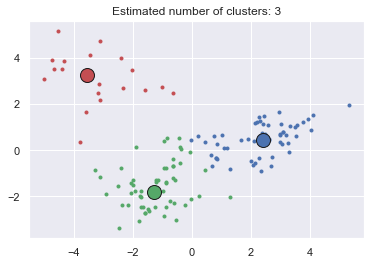

In [67]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

knowledge of the ground truth class assignments **labels_true** and 
our clustering algorithm assignments of the same samples **labels_pred**

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
- adjusted Rand index is a function that measures the similarity of the two assignments

- the Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations.

The following two desirable objectives for any cluster assignment:
- homogeneity: each cluster contains only members of a single class.
- completeness: all members of a given class are assigned to the same cluster.

We can turn those concept as scores.Both are bounded below by 0.0 and above by 1.0 (higher is better)


- homogeneity_score and 
- completeness_score. 

Their harmonic mean called V-measure is computed by 
- v_measure_score



- The Silhouette Coefficient is defined for each sample and is composed of two scores:
a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster.

In [1]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_



In [2]:
labels_true=y
labels_pred=labels

In [3]:
from sklearn import metrics
metrics.adjusted_rand_score(labels_true, labels_pred)  

0.7302382722834697

In [4]:
from sklearn import metrics
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.7483723933229485

In [5]:
metrics.homogeneity_score(labels_true, labels_pred)


0.7514854021988339

In [6]:
metrics.completeness_score(labels_true, labels_pred) 

0.7649861514489816

In [7]:
metrics.v_measure_score(labels_true, labels_pred)  

0.7581756800057786

In [8]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.5525919445213676